In [ ]:
!test -f 'catalog.csv' || curl -LJO http://web.csc.gob.ar/~jzuloaga/epub/catalog.csv

In [ ]:
!test -f 'compressed.tar' || curl -LJO http://web.csc.gob.ar/~jzuloaga/epub/compressed.tar
!tar -xf compressed.tar

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
import glob, os

In [ ]:
div = 10 #NUMERO POR EL QUE SE DIVIDE EL TAMAÑO DEL DATAFRAME, LLEVAR A 1 SI SE QUIEREN USAR TODOS LOS LIBROS

df = pd.read_csv('catalog.csv')

#Filtro por idioma

df = df[df['Idioma'] == 'Español']

#Tomo con correspondiente libro digital

epub_dir = "compressed"  # o donde hayas extraído
epubs = glob.glob(os.path.join(epub_dir, "*.epub"), recursive=True)
epub_names = [os.path.basename(p) for p in epubs]

df["file_name"] = df["EPL Id"].astype(str) + ".epub"
df = df[df["file_name"].isin(epub_names)]

display(df)




,EPL Id,Título,Autor,Géneros,Colección,Volumen,Año publicación,Sinopsis,Páginas,Revisión,Idioma,Publicado,Estado,Valoración,Nº Votos,Enlace(s),file_name
3,80570,Memorias del mariscal de campo,Albert Kesselring,"Historia, Memorias",NaN,NaN,1953,El mariscal de campo Albert Kesselring (1885-1...,422,1.1,Español,A:16-07-2025,Disp.,9.8,6,C9F5DAD9D5313AC4C8905A1094545C20D1978C07,80570.epub
20,10598,La ciudadela,A. J. Cronin,Drama,Colección Reno,15.0,1937,La conmovedora lucha de un médico contra la co...,429,1.5,Español,A:15-07-2025,Disp.,9.1,19,EECDD61B9C8D41BE3952321159BD9C86A4DE55B5,10598.epub
27,80424,La filosofía como ciencia estricta,Edmund Husserl,Filosofía,NaN,NaN,1911,"Desde sus primeros comienzos, la filosofía pre...",64,1.0,Español,P:14-07-2025,Disp.,10.0,2,EDAB0946F13DCCED872E1015138E90708B6BBC20,80424.epub
33,80279,El sabor de la tierruca,José María de Pereda,Realista,NaN,NaN,1882,"En El sabor de la tierruca, José María de Pere...",254,1.0,Español,P:14-07-2025,Disp.,10.0,3,51F3D3BEB3DA755D25953523EE1D75278F47964B,80279.epub
35,22994,El hombre del hotel Carlton,Edgar Wallace,"Intriga, Policial",Colección Detective,32.0,1931,"Había una vez un hombre llamado Harry Stone, t...",196,2.1,Español,A:14-07-2025,Disp.,9.0,6,3D61B5D4FE1039377C36093A3BDAAA58E1800A6D,22994.epub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69160,2723,Linguæ Vasconum Primitiæ [es],Bernat Etxepare,Otros,NaN,NaN,1545,Linguæ Vasconum Primitiæ es el primer libro im...,117,1.0,Español,P:25-04-2013,Ver.,10.0,7,A9C48FF0B15BE4CCC6EB1C8BE822B7FB47AF775A,2723.epub
69165,2057,Ética demostrada según el orden geométrico,Baruch Spinoza,Filosofía,NaN,NaN,1677,"Publicada póstumamente en 1677, la Ética, obra...",216,1.0,Español,P:23-04-2013,Disp.,9.3,26,9DA6666104404BF6E17043918519D9706BEB0E31,2057.epub
69167,1729,Los milagros de la vida,Stefan Zweig,Drama,NaN,NaN,1904,Un pintor recibe el encargo de realizar un cua...,63,1.0,Español,P:23-04-2013,Disp.,8.7,19,2FC7144CC10E423C40B446C21FB5F47456583E74,1729.epub
69179,1854,Los ojos del hermano eterno,Stefan Zweig,Histórico,NaN,0.0,1925,"Los ojos del hermano eterno, libro curiosísimo...",40,1.0,Español,P:23-04-2013,Ver.,8.7,39,F9541042FAA809B0FB82B02D7093EF7C6079DF37,1854.epub


In [ ]:
#Analizo la distribución de géneros
genres = df['Géneros'].dropna().str.split(",")
flat = [g.strip() for sublist in genres for g in sublist]
Counter(flat).most_common()

[('Drama', 1201),
 ('Otros', 1059),
 ('Aventuras', 1000),
 ('Policial', 998),
 ('Realista', 854),
 ('Intriga', 689),
 ('Histórico', 591),
 ('Filosofía', 553),
 ('Historia', 533),
 ('Fantástico', 470),
 ('Ciencias sociales', 350),
 ('Humor', 348),
 ('Romántico', 334),
 ('Ciencia ficción', 304),
 ('Memorias', 298),
 ('Terror', 261),
 ('Psicológico', 238),
 ('Espiritualidad', 222),
 ('Juvenil', 211),
 ('Sátira', 198),
 ('Infantil', 196),
 ('Filosófico', 183),
 ('Viajes', 147),
 ('Erótico', 129),
 ('Bélico', 97),
 ('Crítica y teoría literaria', 96),
 ('Ciencias naturales', 76),
 ('Arte', 71),
 ('Biografía', 70),
 ('Psicología', 59),
 ('Didáctico', 42),
 ('Comunicación', 29),
 ('Autoayuda', 28),
 ('Salud y bienestar', 20),
 ('Ciencias exactas', 20),
 ('Sociología', 16),
 ('Política', 13),
 ('Hogar', 11),
 ('Tecnología', 9),
 ('Música', 8),
 ('Biología', 6),
 ('Ucronía', 6),
 ('Manuales y cursos', 6),
 ('Deporte', 6),
 ('Diccionarios y enciclopedias', 5),
 ('Idiomas', 5),
 ('Distopía', 5),
 

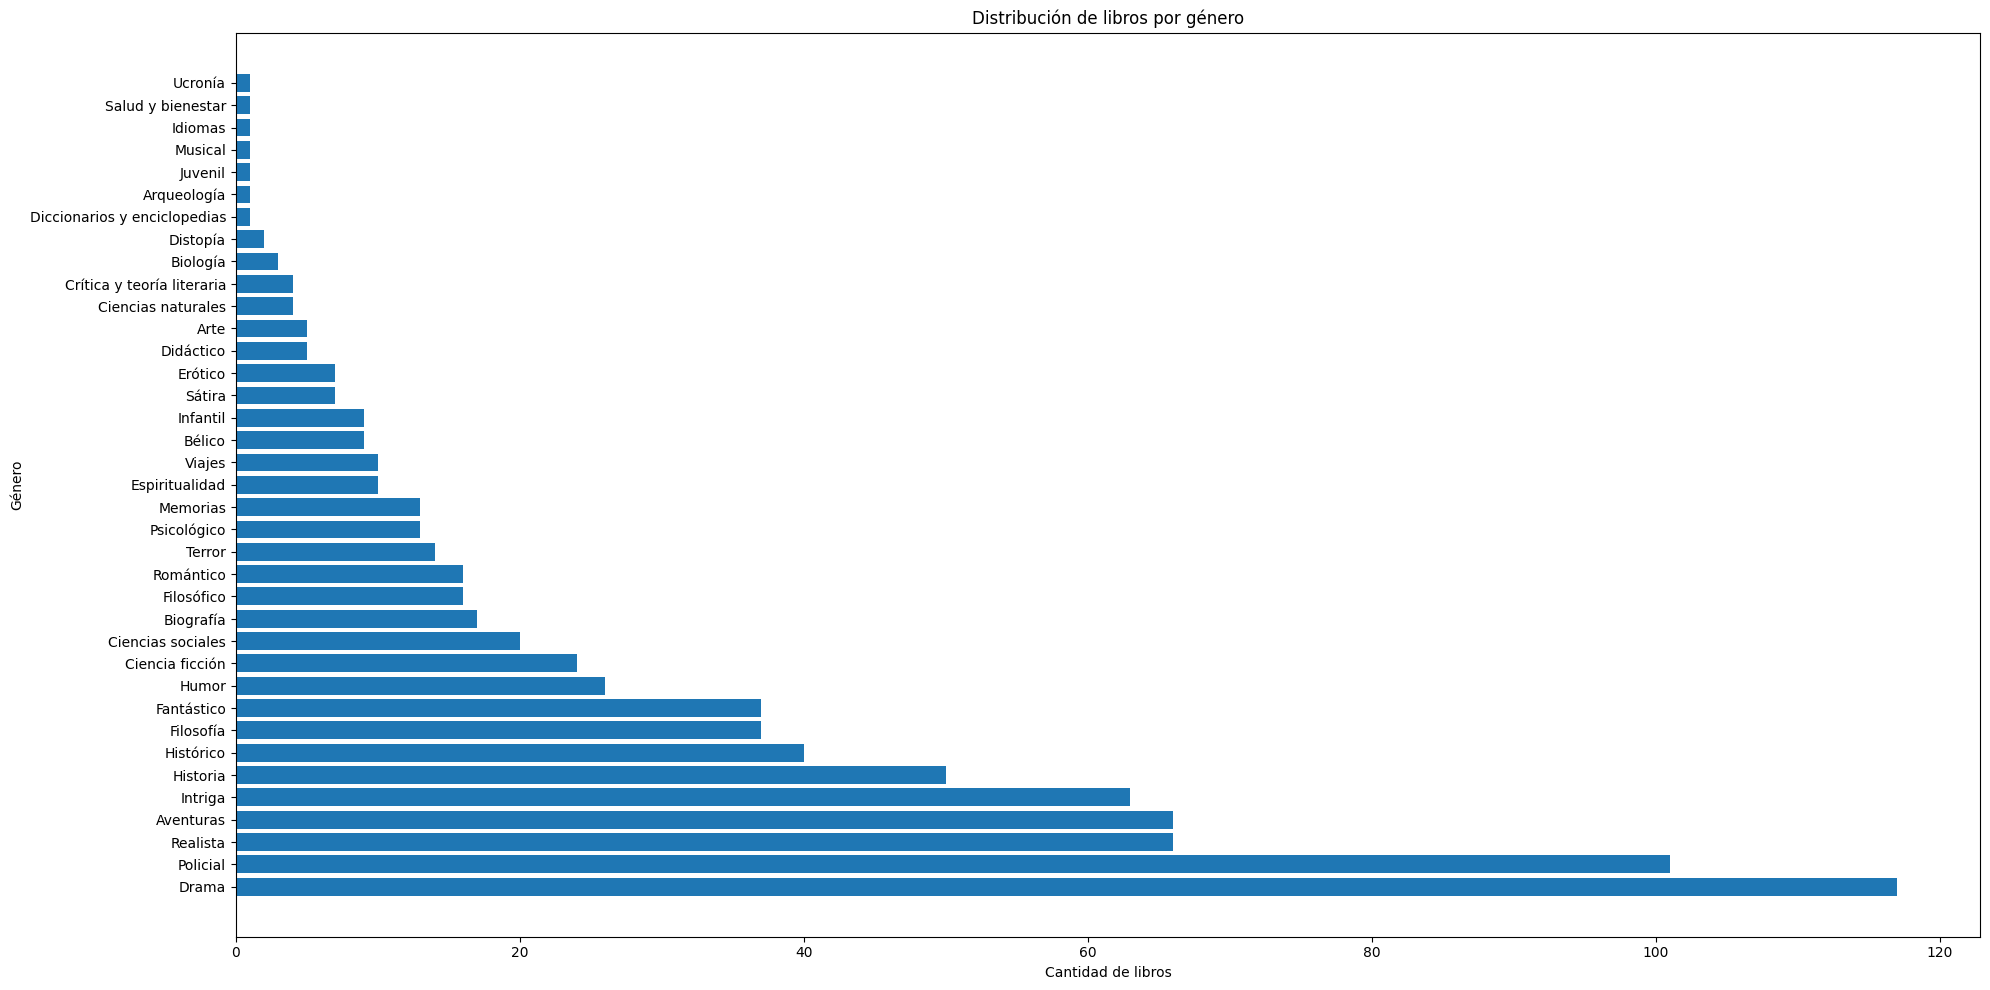

In [ ]:
#Elimino otros
df = df[df['Géneros'] != 'Otros']
df_oyp = df[df['Título'] == 'Orgullo y prejuicio'] #Añado libros con los que voy a comparar (pensé que la consigna pedía esos especificamente)
df_ee = df[df['Título'] == 'Estudio en escarlata']

#Bajo la cantidad de datos
df = df[:int(len(df)/div)]

df = pd.concat([df, df_oyp, df_ee], ignore_index=True)

#Me quedo solo con el primer genero si tiene varios

def funcion_aux(str):
  genres = [g.strip() for g in str.split(",") if g.strip() != ""]
  if genres[0] == "Otros":
    return genres[1]
  return genres[0] if len(genres) > 0 else None

df["Género principal"] = df["Géneros"].apply(funcion_aux)
df = df[df["Género principal"].notna()]

#display(df)

cantidades = df["Género principal"].value_counts()


plt.figure(figsize=(20,10))
plt.barh(cantidades.index, cantidades.values)
plt.xlabel("Cantidad de libros")
plt.ylabel("Género")
plt.title("Distribución de libros por género")
plt.tight_layout()
plt.show()

## Test y Train

Se observa que los sets de test y train siguen una distribución similar para las clases más numerosas pero empeora cuanto menor es la cantidad, esto mejora cuanto más libros se estan tomando para el dataset

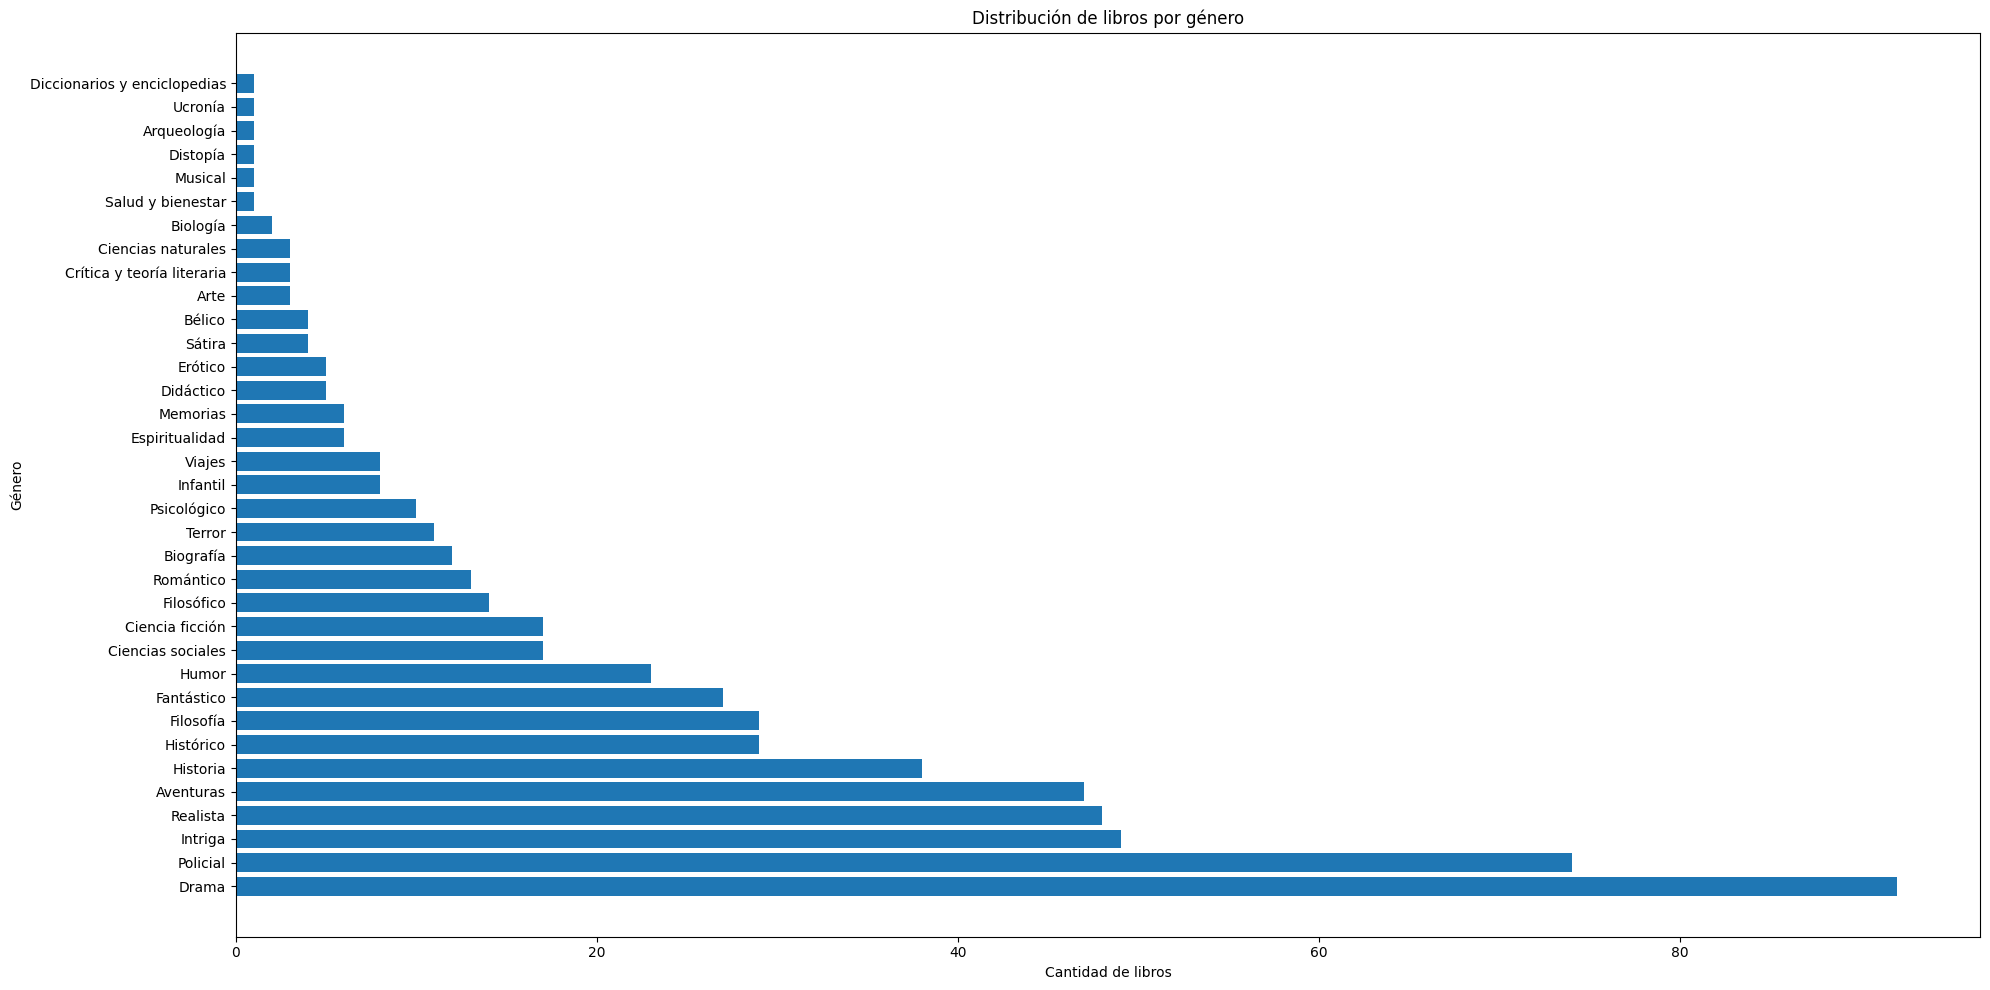

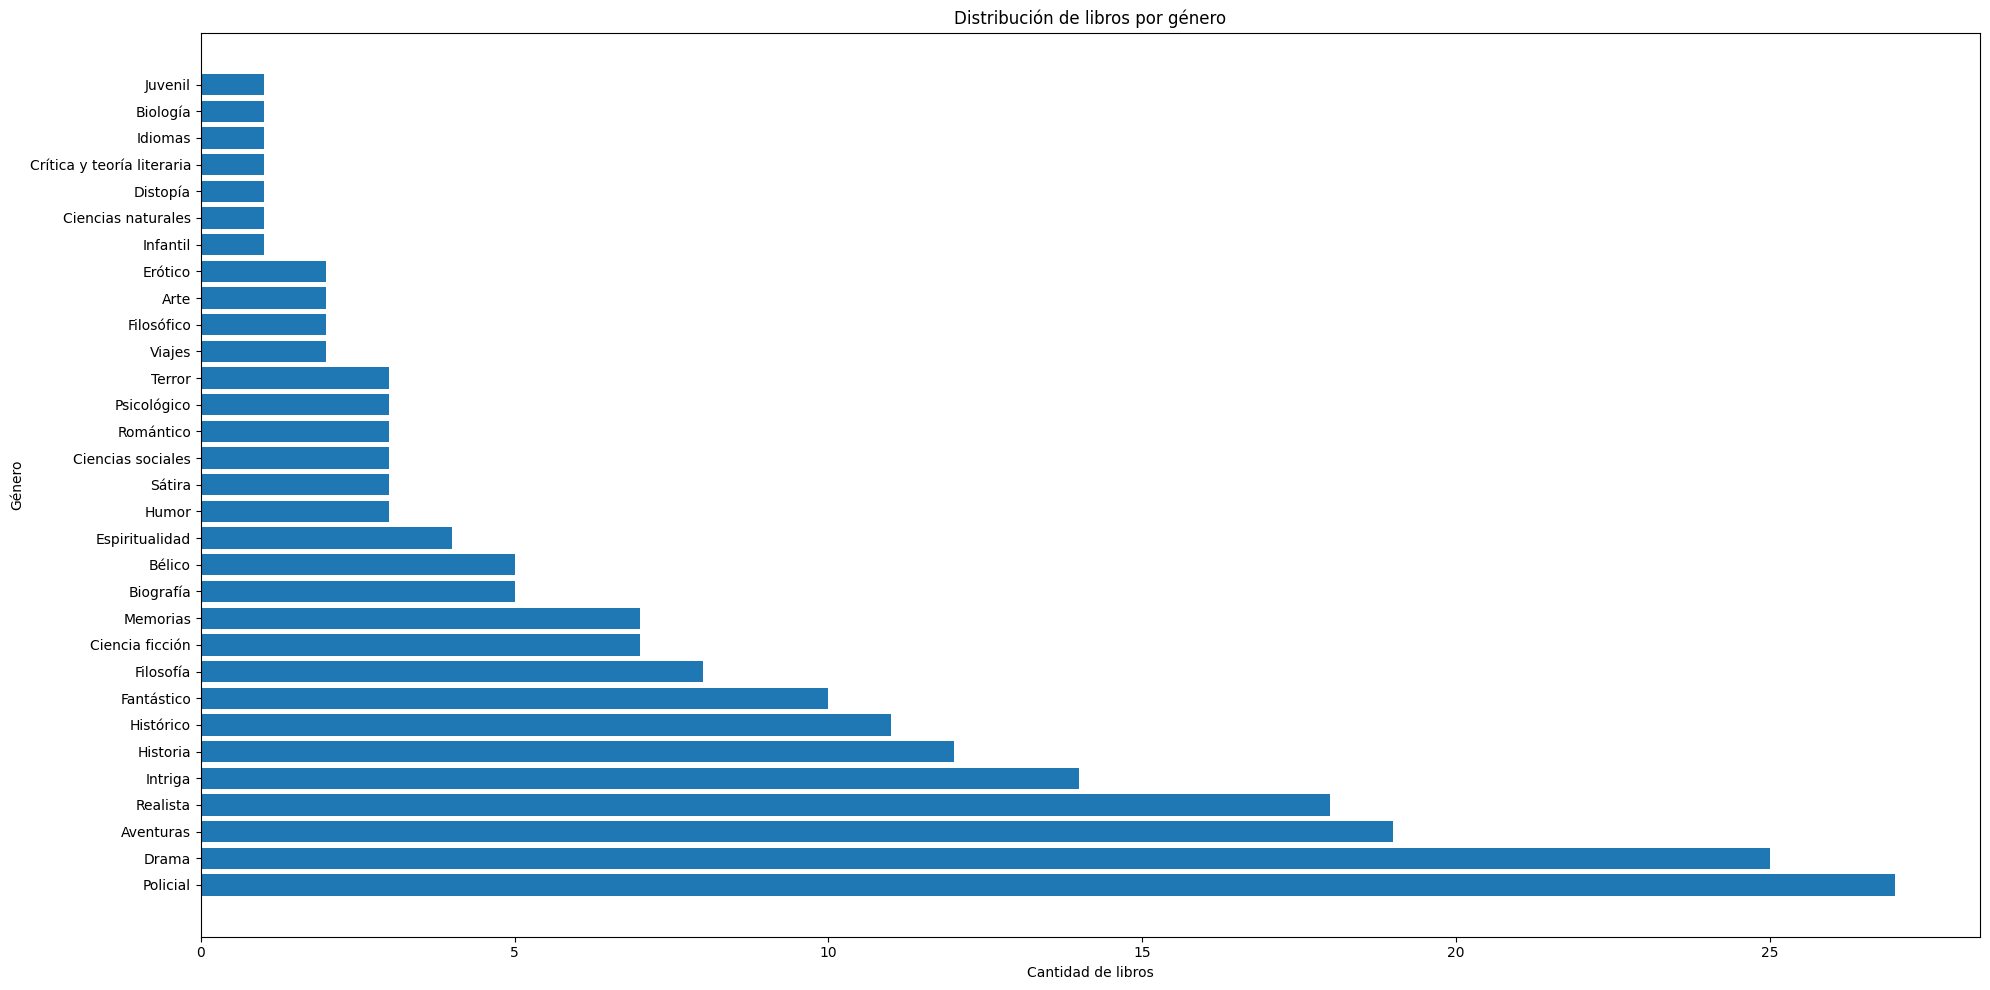

In [ ]:
#Separo en test y train al 25%

train, test = train_test_split(df, test_size=0.25, random_state=1)

cantidades_train = train["Género principal"].value_counts()

plt.figure(figsize=(20,10))
plt.barh(cantidades_train.index, cantidades_train.values)
plt.xlabel("Cantidad de libros")
plt.ylabel("Género")
plt.title("Distribución de libros por género")
plt.tight_layout()
plt.show()

cantidades_test = test["Género principal"].value_counts()


plt.figure(figsize=(20,10))
plt.barh(cantidades_test.index, cantidades_test.values)
plt.xlabel("Cantidad de libros")
plt.ylabel("Género")
plt.title("Distribución de libros por género")
plt.tight_layout()
plt.show()


In [ ]:
!pip install ebooklib

In [ ]:
#Funcion para extraer textos

import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup

def extract_text(epub_path):
    book = epub.read_epub(epub_path)
    texts = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            soup = BeautifulSoup(item.get_body_content(), 'html.parser')
            texts.append(soup.get_text())
    return " ".join(texts)

##Vectorización

Genera un vocabulario a partir de analizar el set de textos proveídos, luego proporciona un conteo de las apariciones de cada una de esas palabras en cada uno de los textos.

In [ ]:
#Descargo un paquete de stopwords para español
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
spanish_stopwords = stopwords.words('spanish')

vectorizer = CountVectorizer(
    stop_words=spanish_stopwords,  # elimina palabras vacías que no aporten significado
    max_df=0.8,            # descarta palabras que aparecen en más del 80% de los libros
    min_df=0.1,              # descarta palabras que aparecen en menos de 10% de los libros
)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Armo un generador para que la vectorización no me coma la RAM

def iter_books(df):
    for _, row in df.iterrows():
        path = 'compressed/' + row['file_name']
        try:
            text = extract_text(path)
            yield text
        except Exception as e:
            print(f"Error en {path}: {e}")

In [ ]:
X_train = vectorizer.fit_transform(iter_books(train))
y_train = train["Género principal"].values

X_test = vectorizer.transform(iter_books(test))
y_test = test["Género principal"].values

In [ ]:
#Para testear consulto el id de un par de libros

df1 = df[df["Título"] == "Estudio en escarlata"]
df2 = df[df["Título"] == "Orgullo y prejuicio"]

vectorizado1 = vectorizer.transform(iter_books(df1))

vectorizado2 = vectorizer.transform(iter_books(df2))


## Chequeo de palabras

Se observa que Estudio en escarlata y Orgullo y prejuicio que son libros con clases muy distintas tienen sus 40 palabras mas frecuentes muy distintas, por lo que se puede asumir que al menos entre estas clases es probable que clasifique bien.

In [ ]:
vocab = np.array(vectorizer.get_feature_names_out())

freq1 = np.asarray(vectorizado1.sum(axis=0)).ravel()
freq2 = np.asarray(vectorizado2.sum(axis=0)).ravel()

# top 40 palabras más frecuentes por libro
idx1 = np.argsort(freq1)[::-1][:40]
idx2 = np.argsort(freq2)[::-1][:40]

top1 = vocab[idx1]
top2 = vocab[idx2]

print(top1)
print(top2)

['repuso' 'sólo' 'mas' 'john' 'éste' 'coche' 'anillo' 'niña' 'montañas'
 'ésta' 'doctor' 'ustedes' 'hallaba' 'observó' 'repuse' 'pregunté'
 'prosiguió' 'crimen' 'policía' 'caballos' 'cazador' 'detective' 'asesino'
 'asesinato' 'añadió' 'pista' 'londres' 'misterio' 'asiento' 'secretario'
 'conocimiento' 'continuación' 'torno' 'hotel' 'cochero' 'estudio' 'hice'
 'presa' 'individuo' 'jardín']
['señorita' 'hermana' 'sólo' 'lady' 'querida' 'hijas' 'hermanas' 'lucas'
 'londres' 'coronel' 'contestó' 'sentimientos' 'felicidad' 'tía'
 'capítulo' 'baile' 'matrimonio' 'añadió' 'tío' 'salón' 'sir' 'caballero'
 'seguida' 'william' 'afecto' 'cortesía' 'mary' 'boda' 'amiga' 'señoría'
 'cariño' 'éste' 'ésta' 'coche' 'atenciones' 'creyó' 'casarse' 'señoras'
 'libras' 'caballeros']


##Multinomial Naive Bayes

Se usará como entrada la cantidad de aparicion $x_i$ por documento de cada una de las palabras $w_i$ del vocabulario y como salida el género del documento. Por lo tanto un documento se representa como $\mathbf{x} = (x_1, ...., x_V)$ con V el tamaño del vocabulario.

Buscamos estimar $P(y_k|\mathbf{x}) \propto c_k\prod_{m=1}^V (\theta_m^{(k)})^{x_m}$.

Si yo busco el argumento maximo sobre k para tomar una decición, es lo mismo que maximizar

$$log(c_k) + \sum_{m=1}^V x_m log(\theta_m^{(k)})$$


$c_k$ es el peso de cada clase, que se saca facil con la cantidad de libros de una clase con respecto a la total.

Para estimar los $\theta$ primero se pueden compactar los $x_{m,i}$ para simplificar los cálculos y al mismo tiempo separarlos por su género correspondiente

$$\bar{x}^{(k)}_m = \sum^n_{i=1} x_{i,m}\,\mathbf{1}{y_i = k}$$

Así es como si englobara todos los textos de entrenamiento de cada clase en uno solo por clase.

Se asume que cada vector de $\theta$ sigue una distribución Dirichlett de parámetros $\boldsymbol{\alpha}$ que son fijados por nosotros, y por ende su distribución a posteriori sigue una Dirichlett de parámetros $\boldsymbol{\bar{x}} + \boldsymbol{\alpha}$


$$\theta_m^{(k)} = \frac{\bar{x}_{m}^{(k)} + \alpha}{\sum_{j=1}^{V} (\bar{x}_{j}^{(k)} + \alpha)}$$




In [ ]:
class MNB:
  def __init__(self, alpha=1):
    self.alpha = alpha
    self.classes = None
    self.X_moño = None
    self.log_theta = None

  def fit(self, X, y):
    #Armo mis clases
    self.classes = np.unique(y)
    k = len(self.classes)
    N = X.shape[0]


    self.c = np.zeros(k)
    self.X_moño = np.zeros((k, X.shape[1]))
    #Itero sobre cada clase
    for i, c in enumerate(self.classes):
      self.c[i] = np.sum(y == c) / N #Calculo cks
      self.X_moño[i] = X[y == c].sum(axis=0)
      self.X_moño[i] = np.asarray(self.X_moño[i]).ravel() #Genero mis vectores de X_moño

    #Estimo theta y su log
    theta_num = self.X_moño + self.alpha
    theta_den = theta_num.sum(axis=1, keepdims=True)
    self.log_theta = np.log(theta_num / theta_den)

    return

  def predict_proba(self, X):
    #Calculo la log proba
    X = X.toarray()
    log_proba = np.log(self.c) + X @ self.log_theta.T
    log_proba -= log_proba.max(axis=1, keepdims=True) #Normalizo antes de pasar a proba normal
    proba = np.exp(log_proba)
    proba /= proba.sum(axis=1, keepdims=True)
    return proba


  def predict(self, X):
    return self.classes[self.predict_proba(X).argmax(axis=1)]




In [ ]:
#Entreno y predigo
mnb = MNB()

mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)

In [ ]:
#Métricas
train_acc = accuracy_score(y_train, mnb.predict(X_train))
print(f"Train accuracy: {train_acc}")
train_f1 = f1_score(y_train, mnb.predict(X_train), average='macro')
print(f"Train F1 score: {train_f1}")


acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc}")
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test F1 score: {f1}")

Train accuracy: 0.8825448613376835
Train F1 score: 0.9141508945550294
Test accuracy: 0.43902439024390244
Test F1 score: 0.2662306476644712


## Comprobación por probabilidad Dummy

Se verificó que la probabilidad de acierto de un predictor dummy sea menor que el accuracy de testeo calculado. Esta verificació prueba que aunque los resultados de nuestro modelo a priori parecen malos, en realidad utilizarlo presenta un beneficio.

In [ ]:
#Dummy
from collections import Counter

conteo = Counter(y_train)
p_max = max(conteo.values()) / len(y_train)

print(f"Probabilidad de acierto: {p_max}")

Probabilidad de acierto: 0.1500815660685155


##Comprobación cualitativa

Se observa que los errores de predicción son sobre géneros muy parecidos (historia e histórico, filosofía y arte, etc.) o sobre generos muy generales (predice "drama" en vez de un género más específico). Este tipo de confusiones son entendibles considerando que para predecir simplemente se utiliza la aparición de ciertas palabras de un vocabulario, sin tener en cuenta la relacion entre ellas.

In [ ]:
test["y_pred"] = y_pred

errores = test[test["Género principal"] != test["y_pred"]]

errores_top = errores.sort_values("Valoración", ascending=False).head(10)
print(errores_top[["Título", "Género principal", "y_pred", "Valoración"]])


                                                Título    Género principal  \
684  El Bandolerismo, Estudio social y memorias his...            Historia   
726                             Bajo el sol de Satanás         Psicológico   
233                                      Radiaciones I            Historia   
17                                  Historias curiosas            Historia   
101  Las tumbas de Saint-Denis y otros relatos de t...              Terror   
743         Un corazón sencillo (trad. Juana Salabert)            Realista   
339                  El culto moderno a los monumentos                Arte   
540                         Historia de las ciencias 2  Ciencias naturales   
509                                 Atormentada tierra            Realista   
484                        El caso de la rubia platino             Intriga   

        y_pred  Valoración  
684  Histórico        10.0  
726      Drama        10.0  
233   Memorias        10.0  
17   Biografía        10.